## Travis Klipp
## Briana Ramirez
## CS 696 Project

### Comparing Performances Between Computational Tools and ARIMA modeling

This script compares the performance between Pandas and Dask for relatively simple computations. There's a separate notebook which calculates the performance using R (see R-Performance Script). The computational performance comparisons are organized as follows:

1. Count the number of occurrences of heavy positive precipitation (500 or more)?
2. Count the number of occurrences of dry precipitation (0 or below)?
3. Produce a histogram of the total rain in San Diego.
4. Calculate the mean values over time for San Diego, LA, and SF.
5. Calculate the variance of the year with the highest mean precipitation.
6. Produce a time series plot of SD, SF, and LA.

A summary of the results will be discussed.

In addition, a simple time series model was implemented; this analysis is shown at the end of the file.

In [78]:
#%% import recon data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask
import dask.dataframe as dd
import vaex

#Basemap is depreciated, so when ready use the following package to use funtion: inspect.cleandoc
#from ipykernel import kernelapp as app

#load US mask
check=open('check.txt','r')
check=check.readlines()

#Graabing only value_strings in check list
check = check[0::2]

#Converting value_strings to floats 
check = [float(x) for x in check]

#Making a boolean list from check list that only contains {0,1}
#false : not in US
#true: in US territory 
check_bool = list(map(bool,check))

#Reading in reconconstructed data 
recon=pd.read_csv('recon8014EOF220.csv')
colnames=list(recon.columns) #get colnames for later

#Array of column names 
colnames=np.array(colnames)

#lose col names
#recon2=np.array(recon)

#List of positions of values 
x = []
for i in range(len(check_bool)):
    if check_bool[i] == True:
        x.append(i)

#grabbing recon values that are in US mask, namely check_bool
recon=recon.iloc[x,:]

In [79]:
#For the sake of analysis, we convert negative values to 0 and values over 500 to 500.
recon.iloc[:,3:12786]=recon.iloc[:,3:12786].apply(lambda x: np.where(x < 0,0,x))
recon.iloc[:,3:12786]=recon.iloc[:,3:12786].apply(lambda x: np.where(x > 500,500,x))



# Pandas

## Count number of occurrences 500 or above.

In [80]:
%%time
recon[recon==500].count().sum()

Wall time: 10.7 s


58

## Count number of occurrences 0 or below.

In [81]:
%%time
recon[recon==0].count().sum()

Wall time: 7.86 s


105542689

## San Diego Total Rain Histogram

Wall time: 213 ms


(array([3.212e+03, 1.151e+03, 5.990e+02, 3.500e+02, 2.120e+02, 1.300e+02,
        9.300e+01, 7.400e+01, 4.800e+01, 4.300e+01, 3.700e+01, 3.300e+01,
        3.400e+01, 2.200e+01, 2.500e+01, 1.700e+01, 1.800e+01, 1.600e+01,
        1.500e+01, 1.100e+01, 1.900e+01, 1.200e+01, 1.900e+01, 1.300e+01,
        1.100e+01, 9.000e+00, 1.300e+01, 5.000e+00, 9.000e+00, 8.000e+00,
        6.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 6.000e+00, 9.000e+00,
        9.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 9.000e+00, 1.000e+00,
        4.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+0

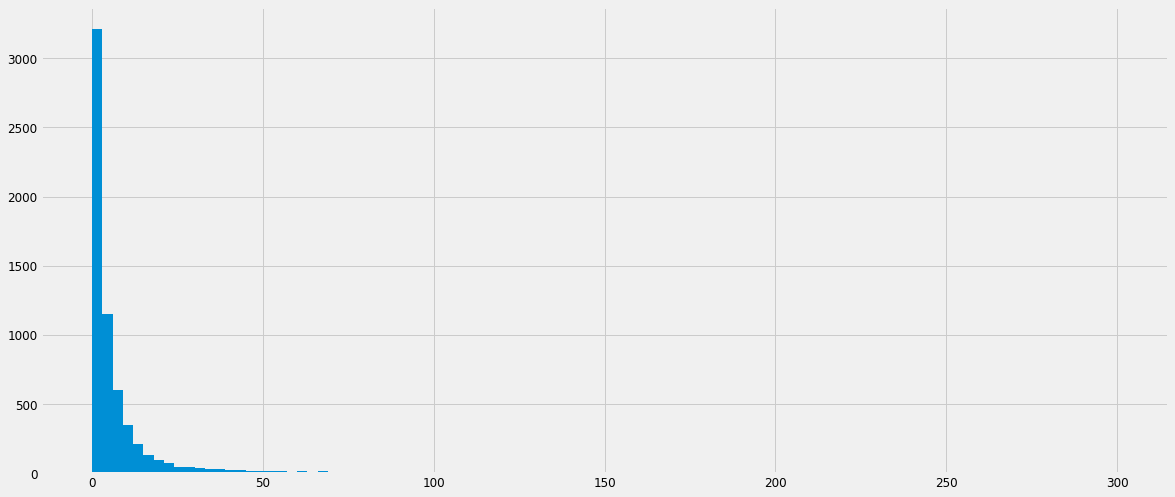

In [83]:
%%time
sandiego1=recon[(recon.lat>=32.625) & (recon.lat<=33.125) & (recon.lon>=-117.375) & (recon.lon<=-116.875) ].iloc[:,3:12786]
#Append summed daily total
sandiego1=sandiego1.append(sandiego1.sum(), ignore_index=True)
#Subset so only have the daily total
sandiego1=pd.DataFrame(sandiego1.iloc[6,:]).reset_index(drop=False)
sandiego1=sandiego1.rename(columns={sandiego1.columns[0]:'Date',sandiego1.columns[1]:'Total Rain'})
#keep nonzero values
sandiego1=sandiego1[sandiego1['Total Rain']!=0]
plt.hist(sandiego1['Total Rain'], bins=100, range = [0,300])


## Mean Values of LA, SD, and SF Over Whole Dataset

In [84]:
%%time
LA=recon[(recon.lat>=33.75) & (recon.lat<=34.25) & (recon.lon>=-118.00) & (recon.lon<=-117.5) ].iloc[:,3:12786]
LA.mean(axis=0)
SF=recon[(recon.lat>=37.5) & (recon.lat<=38) & (recon.lon>=-122.7) & (recon.lon<=-122.2) ].iloc[:,3:12786]
SF.mean(axis=0)
SD=recon[(recon.lat>=32.625) & (recon.lat<=33.125) & (recon.lon>=-117.375) & (recon.lon<=-116.875) ].iloc[:,3:12786]
SD.mean(axis=0)


Wall time: 23.5 ms


1980-01-01    0.000000
1980-01-02    0.000000
1980-01-03    0.000000
1980-01-04    0.000000
1980-01-05    0.163483
                ...   
2014-12-26    0.000000
2014-12-27    0.000000
2014-12-28    0.000000
2014-12-29    0.020730
2014-12-30    1.288650
Length: 12783, dtype: float64

## Variance of 1982

In [85]:
%%time
recon.iloc[:,734:1464].stack().var()

Wall time: 679 ms


41.106958813107276

## Time Series Plot of LA, SF, SD

Wall time: 94.1 ms


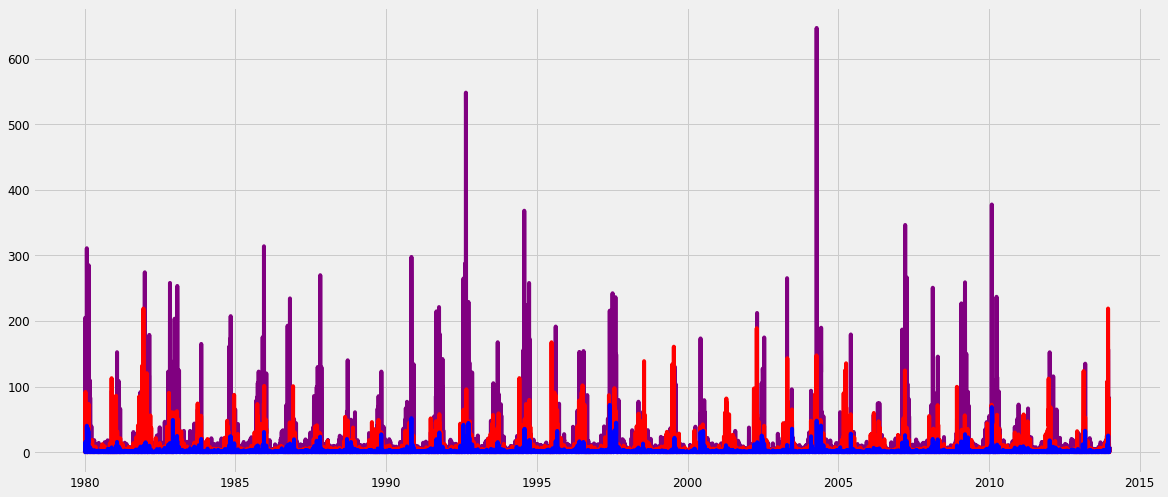

In [86]:
%%time

SD=SD.append(SD.sum(), ignore_index=True)
LA=LA.append(LA.sum(), ignore_index=True)
SF=SF.append(SF.sum(), ignore_index=True)

#Subset so only have the daily total
SD=pd.DataFrame(SD.iloc[6,:]).reset_index(drop=False)
SD=SD.rename(columns={SD.columns[0]:'Date',SD.columns[1]:'Total Rain'})
SF=pd.DataFrame(SF.iloc[2,:]).reset_index(drop=False)
SF=SF.rename(columns={SF.columns[0]:'Date',SF.columns[1]:'Total Rain'})
LA=pd.DataFrame(LA.iloc[3,:]).reset_index(drop=False)
LA=LA.rename(columns={LA.columns[0]:'Date',LA.columns[1]:'Total Rain'})

x = np.linspace(1980,2014,12783)
plt.plot(x,SD['Total Rain'],ls="-",color='purple' )
plt.plot(x,SF['Total Rain'],ls="-",color='red' )
plt.plot(x,LA['Total Rain'],ls="-",color='blue' )

# Dask

In [87]:
#convert to Dask dataframe
daskdf=dd.from_pandas(recon,npartitions=20)

## Count number of occurrences 500 or above.

In [88]:
%%time
daskdf.map_partitions(lambda df: df[df==500].count()).sum().compute()

Wall time: 6.39 s


58

## Count number of occurrences 0 or below.

In [89]:
%%time
daskdf.map_partitions(lambda df: df[df==0].count()).sum().compute()

Wall time: 6.2 s


105542689

## San Diego Total Rain Histogram

Wall time: 294 ms


(array([3.212e+03, 1.151e+03, 5.990e+02, 3.500e+02, 2.120e+02, 1.300e+02,
        9.300e+01, 7.400e+01, 4.800e+01, 4.300e+01, 3.700e+01, 3.300e+01,
        3.400e+01, 2.200e+01, 2.500e+01, 1.700e+01, 1.800e+01, 1.600e+01,
        1.500e+01, 1.100e+01, 1.900e+01, 1.200e+01, 1.900e+01, 1.300e+01,
        1.100e+01, 9.000e+00, 1.300e+01, 5.000e+00, 9.000e+00, 8.000e+00,
        6.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 6.000e+00, 9.000e+00,
        9.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 9.000e+00, 1.000e+00,
        4.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+0

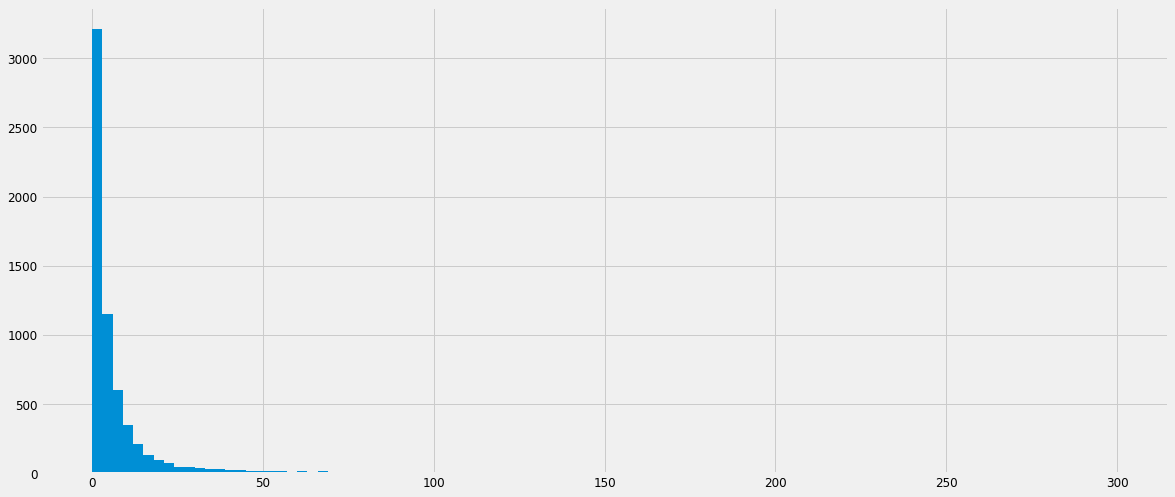

In [90]:
%%time
sandiego1=daskdf[(daskdf.lat>=32.625) & (daskdf.lat<=33.125) & (daskdf.lon>=-117.375) & (daskdf.lon<=-116.875) ].iloc[:,3:12786].compute()
#Append summed daily total
sandiego1=sandiego1.append(sandiego1.sum(),ignore_index=True)
#Subset so only have the daily total
sandiego1=pd.DataFrame(sandiego1.iloc[6,:]).reset_index(drop=False)
sandiego1=sandiego1.rename(columns={sandiego1.columns[0]:'Date',sandiego1.columns[1]:'Total Rain'})
#keep nonzero values
sandiego1=sandiego1[sandiego1['Total Rain']!=0]
plt.hist(sandiego1['Total Rain'], bins=100, range = [0,300])

## Mean of LA, SD, SF over time

In [91]:
%%time
LA=daskdf[(daskdf.lat>=33.75) & (daskdf.lat<=34.25) & (daskdf.lon>=-118.00) & (daskdf.lon<=-117.5) ].iloc[:,3:12786]
LA.mean(axis=0).compute()
SF=daskdf[(daskdf.lat>=37.5) & (daskdf.lat<=38) & (daskdf.lon>=-122.7) & (daskdf.lon<=-122.2) ].iloc[:,3:12786]
SF.mean(axis=0).compute()
SD=daskdf[(daskdf.lat>=32.625) & (daskdf.lat<=33.125) & (daskdf.lon>=-117.375) & (daskdf.lon<=-116.875) ].iloc[:,3:12786]
SD.mean(axis=0).compute()


Wall time: 21.2 s


1980-01-01    0.000000
1980-01-02    0.000000
1980-01-03    0.000000
1980-01-04    0.000000
1980-01-05    0.163483
                ...   
2014-12-26    0.000000
2014-12-27    0.000000
2014-12-28    0.000000
2014-12-29    0.020730
2014-12-30    1.288650
Length: 12783, dtype: float64

## Variance of Year 1982

In [92]:
## Dask doesn't support stack function, so first create pd dataframe with data we need
test=recon.iloc[:,734:1464].stack().reset_index()
testdask=dd.from_pandas(test,npartitions=20)

In [93]:
%%time
testdask.iloc[:,2].var().compute()

Wall time: 159 ms


41.106958815395046

## Time Series Plot LA, SD, SF

Wall time: 7.32 s


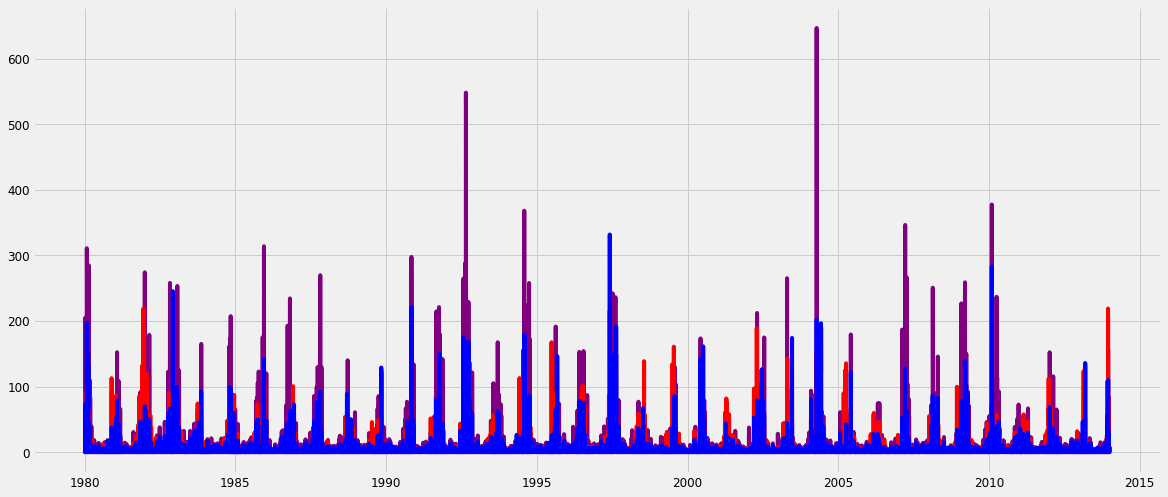

In [94]:
%%time
SD=pd.DataFrame(SD.sum(axis=0).compute())
LA=pd.DataFrame(LA.sum(axis=0).compute())
SF=pd.DataFrame(SF.sum(axis=0).compute())
SD=SD.rename(columns={SD.columns[0]:'Total Rain'})
SF=SF.rename(columns={SF.columns[0]:'Total Rain'})
LA=LA.rename(columns={LA.columns[0]:'Total Rain'})
x = np.linspace(1980,2014,12783)
plt.plot(x,SD['Total Rain'],ls="-",color='purple' )
plt.plot(x,SF['Total Rain'],ls="-",color='red' )
plt.plot(x,LA['Total Rain'],ls="-",color='blue' )

## Summary
Number of Occurrences: Dask slightly outperformed Pandas, and Pandas slightly outperformed R. The difference between each tool was approximately a second. For a problem like this, Dask is probably not needed and Pandas is sufficient enough.

Total Rain Histogram: R was by far the slowest, with the other tools taking less than a second to plot the histogram. There is a widespread opinion that R has better visualization libraries for data science compared to Python. It's likely the colSums function in R really slowed the process.

Mean of LA, SD, SF over time: Pandas performed better than R by over a second and dask took awhile to perform this computation. It's likely the compute function caused delays for each city, thus resulting in a slow time.

Variance of 1982: Dask outperformed both pandas and R. R was by far the slowest, likely due to the unlist function.

Time Series Plot: Dask performed the slowest, likely due to the compute function. Pandas was extremely fast.

Overall, Dask is slightly faster than Pandas for most simple computations. R dataframe operations are generally slower than python but not by much. The R data table package is very useful for speeding up these operations. R generally has better libraries for visualization and time series analysis.


## Time Series Analysis

In [95]:
## Import relevant libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pylab import rcParams
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from matplotlib import pyplot
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import itertools
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [96]:

## Extract only San Diego data
sandiego1=recon[(recon.lat>=32.625) & (recon.lat<=33.125) & (recon.lon>=-117.375) & (recon.lon<=-116.875) ].iloc[:,3:12786]
sandiego1=sandiego1.append(sandiego1.sum(), ignore_index=True)
#Subset so only have the daily total
sandiego1=pd.DataFrame(sandiego1.iloc[6,:]).reset_index(drop=False)
sandiego1=sandiego1.rename(columns={sandiego1.columns[0]:'Date',sandiego1.columns[1]:'Total Rain'})

In [97]:
#Convert to monthly time series. Daily time series is too complicated/granular.
sandiego1.set_index('Date', inplace=True)
sandiego1.index = pd.to_datetime(sandiego1.index)
sandiego1=sandiego1.resample('1M').sum()

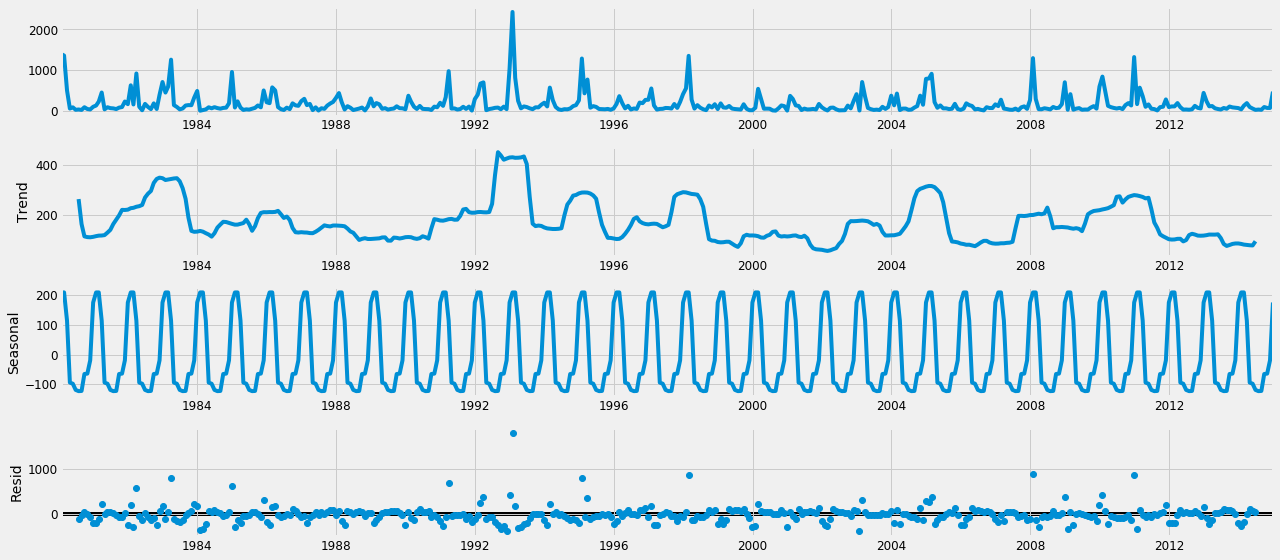

In [98]:
#Want to check for visual signs of non-stationairity such as trend or seasonality.

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sandiego1, model='additive')
fig = decomposition.plot()
plt.show()

There seems to be signs of seasonality. This makes sense since rain tends to be heavier in the winter/early spring seasons. There doesn't appear to be evidence of a noticable trend (not enough for non-stationarity at least), though if we look closely we can see there is less rain in later years (due to a drought). Residuals are kept low for the most part except for the early 90s. It may be a good idea to implement a transformation such as power transformation with a lambda (box-cox transformation) or use one order of differencing.

In [99]:
#Stationarity function obtained from https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Total Rain'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

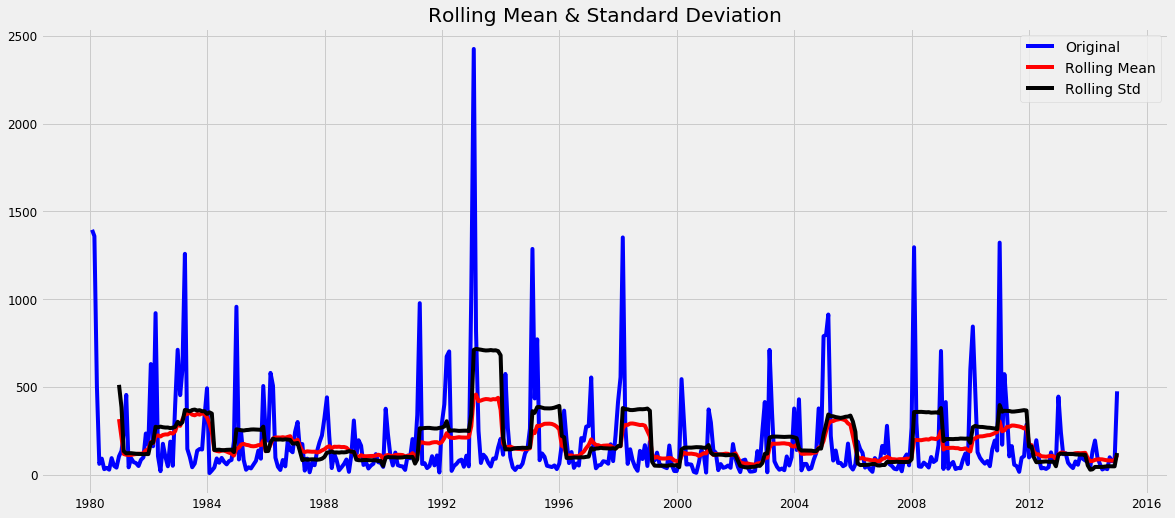

ADF Statistic: -4.862922997386755
p-value: 4.115742656946063e-05
Critical Values:
	1%: -3.446479704252724
	5%: -2.8686500930967354
	10%: -2.5705574627547096


In [100]:
#Call stationary test function
get_stationarity(sandiego1)

The above graph displays the rolling mean and standard deviation in San Diego over the years. The red displays the mean and the black displays the standard deviation. A stationary process would have a constant mean and variance. While the mean and variance both fluctuate slightly, it seems relatively constant and seems to change due to seasonality. The ADF statistic is the Augmented Dickey-Fuller statistic, which tests the null hypothesis a null root is present in the time series sample. The alternative hypothesis states the process is stationary .In this case, the p-value for the test was extremely small (nearly 0), so we reject the null hypothesis and the process appears to be stationary. 

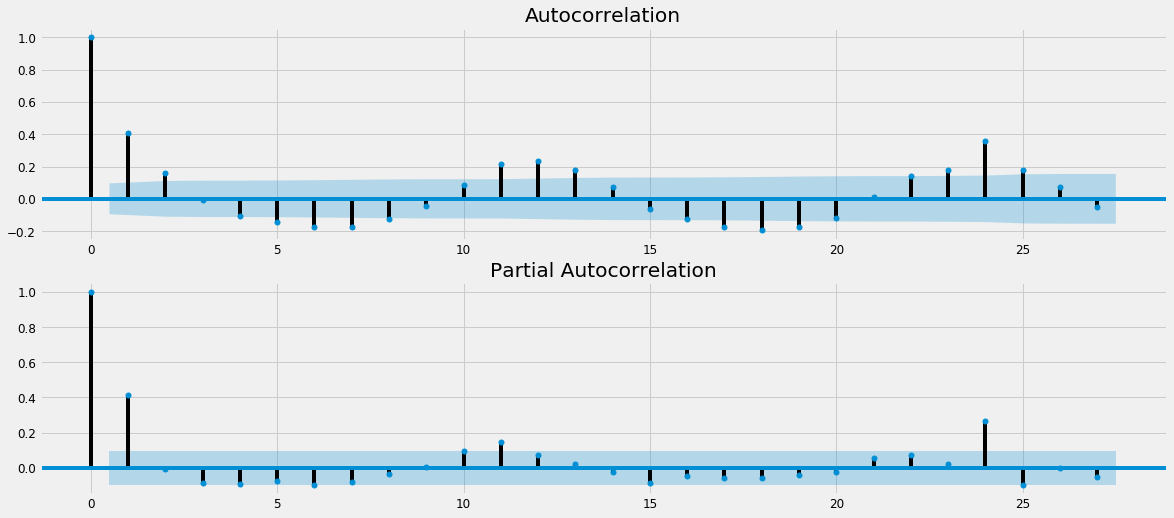

In [101]:
#
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(sandiego1, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(sandiego1, ax=pyplot.gca())
pyplot.show()

The ACF plot shows an initial spike at lag 1 and slowly levels off, but we see another notable spike at lag 24. The PACF shows an initial spike at lag 1 and another at lag 24. If these plots displayed stability, generally, we'd see all the spikes within the confidence interval after the first couple lags. It's possible this data needs to have one order of differencing, contrary to the ADF test. Since there are spikes at lag 1 for both the ACF and PACF, we're probably looking at at least an ARMA(1,1) or ARIMA(1,1,1) with one order of differencing.

In [102]:
# Code obtained from https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
#This sets up various ARIMA model combinations. Want to choose a model that minimizes AIC.
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [103]:
#The below code suggests various ARIMA combinations
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sandiego1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5986.617264933144
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5745.211601872385
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5812.557441590863
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5395.900732285047
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5705.011745199635
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5562.897873885846
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5495.691176216887
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5397.405277884174
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5839.108681303907
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5656.448900597412
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5768.587526327285
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5354.980950548083
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5656.303127071069
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5511.6868262298885
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5464.061803908347
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5354.758193710673
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5878.59805917487
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5710.165089633465
ARIMA(0, 1

The grid search above suggests the ARIMA(1,1,1) model as it yielded the lowest AIC. 

In [104]:
# Summary of model findings.
mod = sm.tsa.statespace.SARIMAX(sandiego1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2755      0.033      8.384      0.000       0.211       0.340
ma.L1         -1.0000      0.028    -36.199      0.000      -1.054      -0.946
ar.S.L12      -0.0837      0.036     -2.308      0.021      -0.155      -0.013
ma.S.L12      -0.8961      0.025    -35.222      0.000      -0.946      -0.846
sigma2      4.317e+04    6.4e-07   6.75e+10      0.000    4.32e+04    4.32e+04


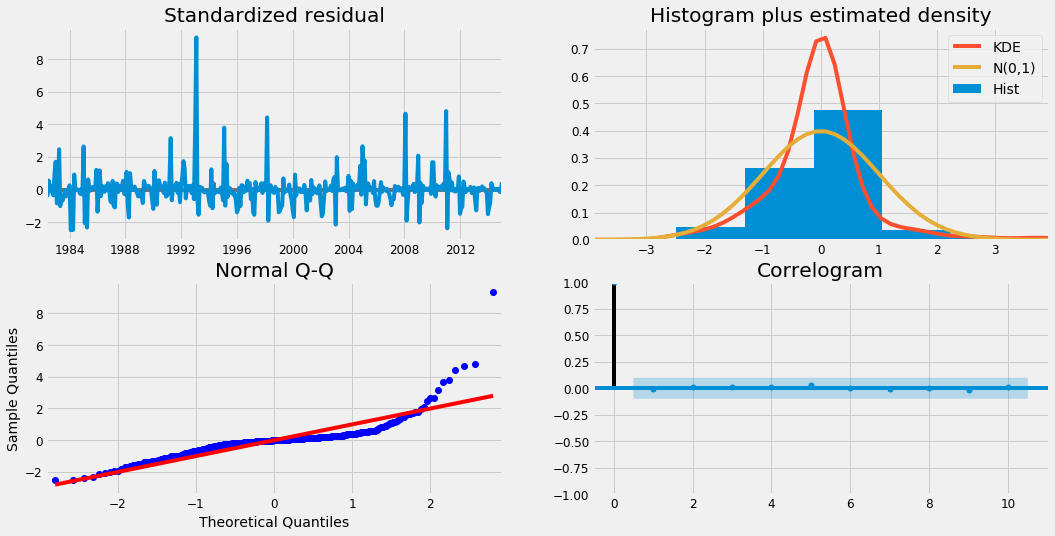

In [105]:
#Diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Based on the above diagnostic plots, it appears the residuals aren't exactly normally distributed. A better model could be fit, but this was more of a simple exercise displaying the functionality of time series in python. Our data was transformed so dry precipitation was modified to 0. If we kept the negative values, we'd likely see a different kind of model.

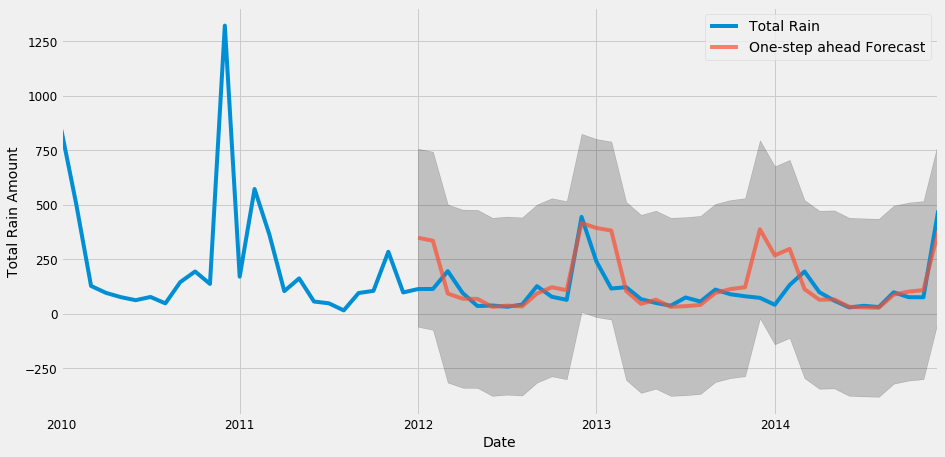

In [106]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = sandiego1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Rain Amount')
plt.legend()
plt.show()

The above graph displays a forecast from the year 2012; this is one way of visually seeing how good the model fit is. It's not perfect, but follows a similar general pattern.

References:

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7    
    
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://www.stat.pitt.edu/stoffer/tsa4/tsa4.pdf